In [1]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy

In [2]:
def generate_real():
  real_data = torch.FloatTensor(
      [random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),
       random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2)]
  )
  return real_data


In [3]:
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [4]:
class Discriminator(nn.Module):
  
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSELoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0;
    self.progress = []

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs, targets)
    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

  pass

In [5]:
D = Discriminator()

for i in range(10000):
    # real data
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


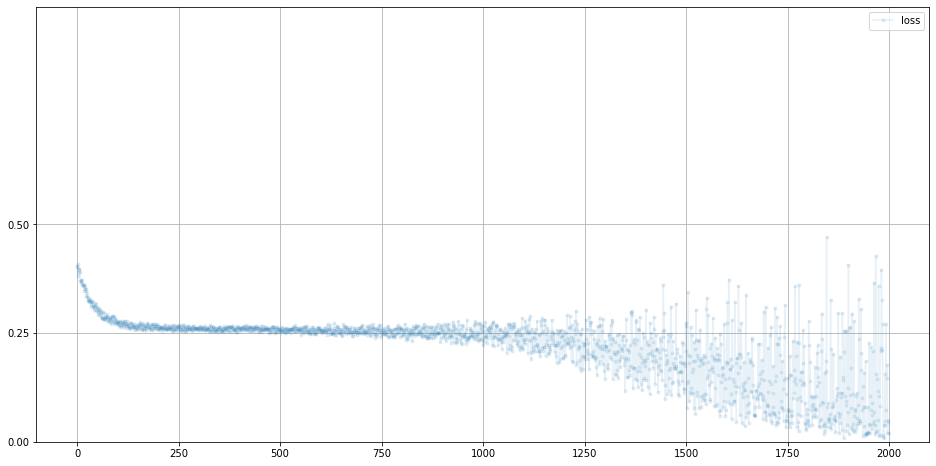

In [6]:
D.plot_progress()

In [7]:
print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.76187664270401
0.2186133712530136


In [9]:
class Generator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

    # create optimiser, simple stochastic gradient descent
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
    # counter and accumulator for progress
    self.counter = 0;
    self.progress = []
        
    pass
    
    
  def forward(self, inputs):        
    # simply run model
    return self.model(inputs)
    
    
  def train(self, D, inputs, targets):
    # calculate the output of the network
    g_output = self.forward(inputs)
        
    # pass onto Discriminator
    d_output = D.forward(g_output)
        
    # calculate error
    loss = D.loss_function(d_output, targets)

    # increase counter and accumulate error every 10
    self.counter += 1;
    if (self.counter % 10 == 0):
       self.progress.append(loss.item())
       pass

    # zero gradients, perform a backward pass, update weights
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass
    
    
  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass
    
  pass

In [10]:
G = Generator()

G.forward(torch.FloatTensor([0.5]))

tensor([0.6590, 0.4765, 0.5950, 0.3767], grad_fn=<SigmoidBackward0>)

In [16]:
%%time 

# create Discriminator and Generator

D = Discriminator()
G = Generator()

image_list = []

# train Discriminator and Generator

for i in range(100000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # add image to list every 1000
    if (i % 1000 == 0):
      image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )

    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
CPU times: user 2min 15s, sys: 249 ms, total: 2min 15s
Wall time: 2min 15s


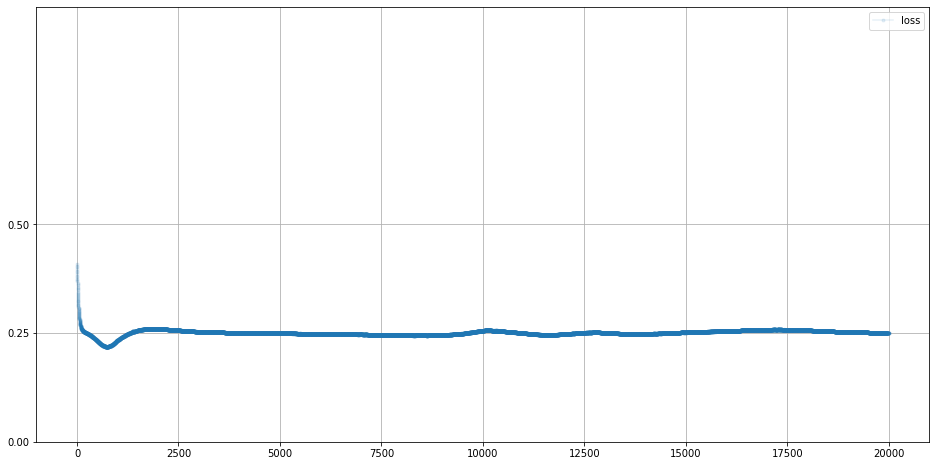

In [17]:
# plot discriminator error

D.plot_progress()

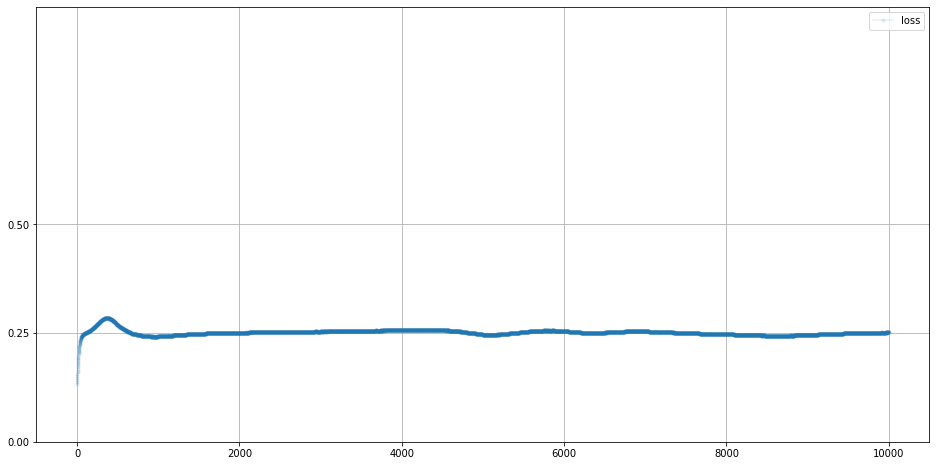

In [18]:
# plot generator error

G.plot_progress()

In [19]:
# manually run generator to see it's outputs

G.forward(torch.FloatTensor([0.5]))

tensor([0.8100, 0.0275, 0.9509, 0.0342], grad_fn=<SigmoidBackward0>)

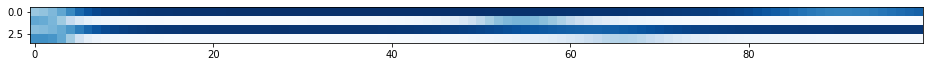

In [20]:
# plot images collected during training

plt.figure(figsize = (16,8))

plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')